In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [17]:
data_dir ="C:\\Users\\HP\\Downloads\\Animal 10\\Animal 10\\raw-img"
class_names = os.listdir(data_dir)

class_names

['cane',
 'cavallo',
 'elefante',
 'farfalla',
 'gallina',
 'gatto',
 'mucca',
 'pecora',
 'ragno',
 'scoiattolo']

In [18]:
# Image data generators

In [19]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
# Split data for training and validation

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir, 
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


In [20]:
# Load pre-trained ResNet50 model

In [21]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 27s 0us/step


In [22]:
# Freeze base model layers

In [23]:
for layer in model.layers:
    layer.trainable = False

In [24]:
# Add custom classifier

In [25]:
animal_model = models.Sequential()
animal_model.add(model)
animal_model.add(layers.GlobalAveragePooling2D())
animal_model.add(layers.Dense(129, activation='relu'))
animal_model.add(layers.Dropout(0.5))
animal_model.add(layers.Dense(len(class_names), activation='softmax'))

In [26]:
# Compile the model

In [27]:
animal_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
# Train the model

In [29]:
history = animal_model.fit(train_generator,
                           validation_data = validation_generator,
                           epochs=1)

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 988s 1s/step - accuracy: 0.1947 - loss: 2.2391 - val_accuracy: 0.2768 - val_loss: 2.0908


In [30]:
# Optionally, fine-tune more layers
# Unfreeze the last few layers of the base model

In [31]:
for layer in model.layers[-20:]:
    layer.trainable = True

In [32]:
# Recompile the model after changes

In [33]:
animal_model.compile(optimizer=Adam(1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
history_fine = animal_model.fit(train_generator, 
                         validation_data=validation_generator, 
                         epochs=1)

655/655 ━━━━━━━━━━━━━━━━━━━━ 1142s 2s/step - accuracy: 0.2362 - loss: 2.3772 - val_accuracy: 0.4050 - val_loss: 1.7785


In [35]:
# Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


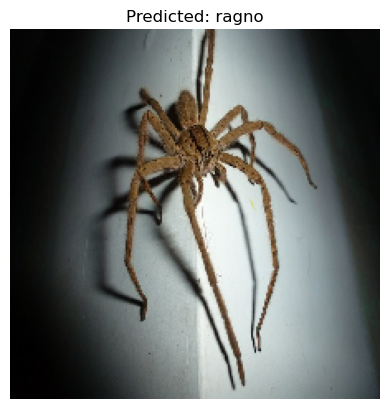

In [38]:
def prediction(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_arr = image.img_to_array(img)
    img_arr = np.expand_dims(img_arr, axis=0)
    img_arr /= 255.0

    predictions = animal_model.predict(img_arr)
    predicted_class = class_names[np.argmax(predictions[0])]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

test_image_path = 'C:/Users/HP/Downloads/Animal 10/Animal 10/raw-img/ragno/e83cb2082bfd013ed1584d05fb1d4e9fe777ead218ac104497f5c97ca5ecb5b1_640.jpg'
prediction(test_image_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


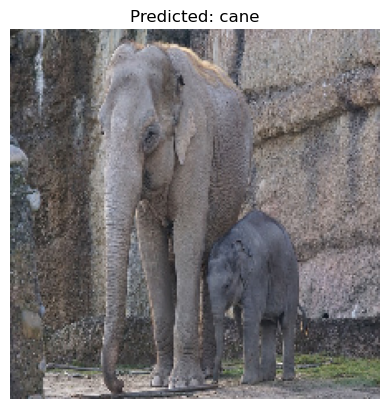

In [39]:
test_image_path = 'C:/Users/HP/Downloads/Animal 10/Animal 10/raw-img/elefante/e133b10d2bf21c22d2524518b7444f92e37fe5d404b0144390f8c07aa4e5b0_640.jpg'
prediction(test_image_path)